# Potential flow, airfoil
_Gilbert François Duivesteijn_



In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

## Source panel method: Normal velocity geometric integral

The normal velocity component for source panel $i$ plus uniform flow can be written as

\begin{align}
V_{n,i} = \underbrace{V_\infty \cos(\beta_i)}_{\textrm{uniform}} + \underbrace{\sum_{j=1}^N  \int_j \frac{\partial}{\partial n_i} \frac{\lambda_j}{2 \pi} \ln(r_{i,j}) ds_j}_{\textrm{N sources}} = 0
\end{align}

The sum of integrals only depends on the geometry. Let's consider the integral part first. Write the constant term $\frac{\lambda_j}{2 \pi}$ outside the integral and use the chainrule to integrate the $\ln$ term:

\begin{align}
I_{i,j} &= \int_j \frac{\partial}{\partial n_i}  \ln(r_{i,j}) ds_j \label{eq:i_ij1} \\
        &= \int_j \frac{1}{r_{i,j}} \frac{\partial r_{i,j}}{\partial n_i} ds_j \label{eq:i_ij2}
\end{align}

Recall the expression for the length of the panel $r$:

\begin{align}
r_{i,j} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}, \label{eq:r_ij}
\end{align}

The partial derivative $\frac{\partial r_{i,j}}{\partial n_i}$ becomes

\begin{align}
\frac{\partial r_{i,j}}{\partial n_i} &=  \frac{\partial}{\partial n_i}\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2} \\
&= \frac{2(x_i - x_j)\frac{\partial x_i}{\partial n_i} + 2(y_i - y_j)\frac{\partial y_i}{\partial n_i}}{2\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}} \\
&= \frac{(x_i - x_j)\frac{\partial x_i}{\partial n_i} + (y_i - y_j)\frac{\partial y_i}{\partial n_i}}{\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}} \\
\end{align}

Multiplying both sides with $\frac{1}{r_{i,j}}$ and using (\ref{eq:r_ij}):

\begin{align}
\frac{1}{r_{i,j}} \frac{\partial r_{i,j}}{\partial n_i} &=\frac{(x_i - x_j)\frac{\partial x_i}{\partial n_i} + (y_i - y_j)\frac{\partial y_i}{\partial n_i}}{(x_i - x_j)^2 + (y_i - y_j)^2} \label{eq:oordrdn}
\end{align}

Plugging (\ref{eq:oordrdn}) in (\ref{eq:i_ij2}) gives:
\begin{align}
I_{i,j} &= \int_j \frac{(x_i - x_j)\frac{\partial x_i}{\partial n_i} + (y_i - y_j)\frac{\partial y_i}{\partial n_i}}{(x_i - x_j)^2 + (y_i - y_j)^2} ds_j \label{eq:i_ij3}
\end{align}

Now we have to find expressions for $\frac{\partial x_i}{\partial n_i}$ and $\frac{\partial y_i}{\partial n_i}$.

```
     Panel i    i  o 
                  /
                 /
          .... ./........
               /\)*
              /  \
             /    \
       i+1  o      x n_i
```


```
           dx_i
         ------+
         \ )*  |
          \    | dy_i
           \   |
      dn_i  \  |
             \ |
              \|           )* = delta_i
               x  n_i
```
For panel $i$, we can find the derivatives by looking at the geometry:

\begin{align}
\frac{\partial x_i}{\partial n_i} = \cos(\delta_i) \label{eq:dxdn} \\
\frac{\partial y_i}{\partial n_i} = \sin(\delta_i) \label{eq:dydn}.  \\
\end{align}

Substituting in (\ref{eq:i_ij3}) gives

\begin{align}
I_{i,j} &= \int_j \frac{(x_i - x_j) \cos(\delta_i) + (y_i - y_j)  \sin(\delta_i)}{(x_i - x_j)^2 + (y_i - y_j)^2} ds_j \label{eq:i_ij4}
\end{align}

Convert the angles $\delta_i$ into $phi_i$

\begin{align}
\cos(\delta_i) &= \cos(\phi_i + \pi/2) = -sin(\phi_i) \\
\sin(\delta_i) &= \sin(\phi_i + \pi/2) = cos(\phi_i)
\end{align}

Substituting in (\ref{eq:i_ij4}) gives
\begin{align}
I_{i,j} &= \int_j \frac{(x_i - x_j) (- \sin(\phi_i)) + (y_i - y_j)  \cos(\phi_i)}{(x_i - x_j)^2 + (y_i - y_j)^2} ds_j \label{eq:i_ij5}
\end{align}

Unfortunaltely this integral is in a form which is not easily solveble. Expression  (\ref{eq:i_ij5}) will be written in a form that 

Rewrite $x_j$ and $y_j$ in terms of $s_j$:

```
               x (x_j, y_j) 
              /
         x   / 
   s_j  /   / )* phi_j
      \    /........
          o  (Xj, Yj)
```

\begin{align}
x_j &= X_j + s_j \cos(\phi_j) \\
y_j &= Y_j + s_j \sin(\phi_j)
\end{align}

In [2]:
def load_airfoil(filepath):
    with open(filepath, "r") as fp:
        data = fp.readlines()
    Xi = []
    for i, d in enumerate(data):
        if i > 0:
            d = d.replace("\n", "")
            xy = d.split()
            Xi.append([float(xy[0]), float(xy[1])])
    Xi = np.array(Xi)
    Xi = Xi.T
    return Xi

In [3]:
def plot_airfoil(Xi, Xih, dn, dt, with_normals=True):
    fig = plt.figure(figsize=(6, 6)) 
    plt.plot(Xi[0], Xi[1], marker="+", color="black", alpha=0.5)
    plt.fill(Xi[0], Xi[1], color="black", alpha=0.2)
    if with_normals:
        plt.quiver(Xih[0], Xih[1], dn[0], dn[1], color="cyan", alpha=1)
        plt.quiver(Xih[0], Xih[1], dt[0], dt[1], color="cyan", alpha=1)
    plt.scatter(Xih[0], Xih[1], marker="o", color="red")
    plt.axis("equal")
    plt.show()


In [4]:
def compute_panels_properties(Xi, alphaA, with_debug=True):
    """
    
    Parameters
    ----------
    Xi: np.ndarray
        X_i -> (x,y) coordinates of panel nodes, array of (2, N) elements.
    alphaA: float
        Angle of attack
    
    Returns
    -------
    Xih: np.ndarray
        X_{i+1/2} => Midpoints of the panels
    Sx: np.ndarray
        Panel length in x direction
    Sy: np.ndarray
        Panel length in y direction
    S: np.ndarray
        Absolute panel length
    dt: np.ndarray
        Tangent unit vector, located at Xih
    dn: np.ndarray
        Normal unit vector, located at Xih
    """
    n = Xi.shape[1]                         # number of geometry nodes
    
    Xih = (Xi[:,1:n] + Xi[:,0:n-1])/2       # Panel midpoints (n-1 panels)
    
    Sx = Xi[0,1:n] - Xi[0,0:n-1]            # Panel surface x-direction
    Sy = Xi[1,1:n] - Xi[1,0:n-1]            # Panel surface y-direction
    S = np.sqrt(Sx**2 + Sy**2)              # Panel surface
    
    dt = (Xi[:,1:n] - Xi[:,0:n-1])          # Panel tangents
    dt = dt / np.linalg.norm(dt, axis=0)

    T = np.array([[0, -1], [1, 0]])         # 90deg transformation matrix
    dn = T @ dt                             # Panel normals
    
    phiD = np.arctan2(dt[1], dt[0])
    #deltaD = phiD + .5*np.pi
    deltaD = np.arctan2(dn[1], dn[0])
    betaD = deltaD - alphaA
    
    if with_debug:
        print("Xih: "); print(Xih)
        print("Sx: "); print(Sx)
        print("Sy: "); print(Sy)
        print("S: "); print(S)
        print("dt: "); print(dt)
        print("dn: "); print(dn)
        print("phiD: "); print(phiD)
        print("deltaD: "); print(deltaD)
    return Xih, S, Sx, Sy, dt, dn

In [5]:
Xi = load_airfoil("../data/airfoil_dat_selig/goe623.dat")
Xi = Xi[:,::-1]

Xih, Sih, Sx, Sy, dt, dn = compute_panels_properties(Xi, 0)

print(Xi.shape, Xih.shape)

Xih: 
[[ 9.7500e-01  9.2500e-01  8.5000e-01  7.5000e-01  6.5000e-01  5.5000e-01
   4.5000e-01  3.5000e-01  2.5000e-01  1.7500e-01  1.2500e-01  8.7500e-02
   6.2500e-02  3.7500e-02  1.8750e-02  6.2500e-03  6.2500e-03  1.8750e-02
   3.7500e-02  6.2500e-02  8.7500e-02  1.2500e-01  1.7500e-01  2.5000e-01
   3.5000e-01  4.5000e-01  5.5000e-01  6.5000e-01  7.5000e-01  8.5000e-01
   9.2500e-01  9.7500e-01]
 [-8.1000e-04 -2.4350e-03 -4.8750e-03 -8.1250e-03 -1.1375e-02 -1.4625e-02
  -1.7875e-02 -2.1125e-02 -2.4125e-02 -2.5810e-02 -2.6185e-02 -2.5405e-02
  -2.3220e-02 -1.9285e-02 -1.4640e-02 -6.2950e-03  1.1205e-02  2.7610e-02
   4.0470e-02  5.4285e-02  6.5095e-02  7.5815e-02  8.5690e-02  9.3375e-02
   9.7375e-02  9.3875e-02  8.4375e-02  7.1125e-02  5.4375e-02  3.4875e-02
   1.9565e-02  8.6900e-03]]
Sx: 
[-0.05   -0.05   -0.1    -0.1    -0.1    -0.1    -0.1    -0.1    -0.1
 -0.05   -0.05   -0.025  -0.025  -0.025  -0.0125 -0.0125  0.0125  0.0125
  0.025   0.025   0.025   0.05    0.05    0.1     0

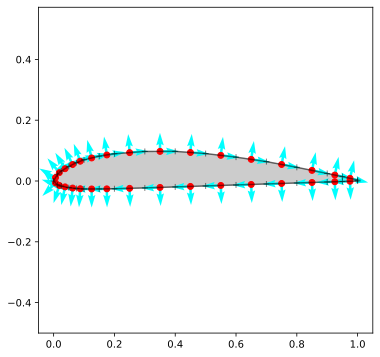

In [6]:
plot_airfoil(Xi, Xih, dn, dt, with_normals=True)